# QEのCohesive energyを計算する
Cohesive energy = (構造緩和計算後のTotal Energy - 原子数 * 孤立原子のエネルギー) / 原子数

In [3]:
# diamodでrelax計算したものを取得する
from glob import glob

path2relax = "/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export"
all_atoms_files = glob(f"{path2relax}/**/atoms.pkl", recursive=True)
print(len(all_atoms_files))

2487


In [11]:
# エネルギーと体積を取得する
import pickle
import os

vol_energy_list_dict = {
    "vol": [],
    "energy": [],
    "n_atoms": [],
    "dir_name": []
}
for atoms_file in all_atoms_files:
    print(atoms_file)
    try:
        atoms = pickle.load(open(atoms_file, "rb"))
        vol_energy_list_dict["vol"].append(atoms.get_volume())
        vol_energy_list_dict["energy"].append(atoms.energy)
        vol_energy_list_dict["n_atoms"].append(atoms.n_atoms)
        vol_energy_list_dict["dir_name"].append(os.path.dirname(atoms_file))
    except Exception as e:
        print(e)
        continue

/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atoms_11/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atoms_16/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atoms_29/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atoms_20/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atoms_5/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atoms_27/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atoms_18/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_16e46f04-d35d-45d1-8ef0-fbdbc0bd6f78/atoms/atom

/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms_25/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms_0/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms_13/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms_9/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms_14/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms_36/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms_31/atoms.pkl
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_03b2ea76-9f88-45b2-93c5-e9e48d250c92/atoms/atoms

In [12]:
import pandas as pd

vol_energy_df = pd.DataFrame(vol_energy_list_dict)

In [14]:
vol_energy_df["vol_per_atom"] = vol_energy_df["vol"] / vol_energy_df["n_atoms"]
vol_energy_df["energy_per_atom"] = vol_energy_df["energy"] / vol_energy_df["n_atoms"]

In [26]:
-40688.04061825547/64

-635.7506346602418

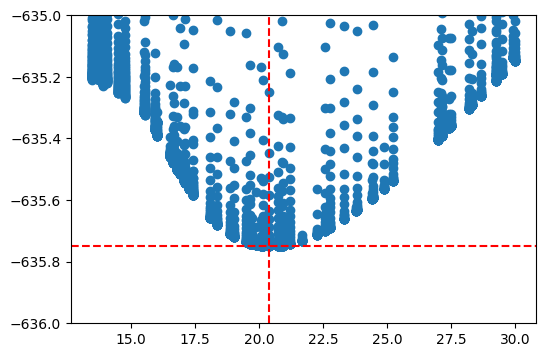

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(vol_energy_df["vol_per_atom"], vol_energy_df["energy_per_atom"])
ax.set_ylim(-636, -635)

# plot horisontal line at -635.7506346602418 eV
ax.axhline(-635.7506346602418, color="red", linestyle="--")
ax.axvline(20.371578, color="red", linestyle="--")

In [29]:
# get minimum energy
min_energy = vol_energy_df["energy"].min()
min_energy

-40688.04061825547

In [33]:
from mlptools.utils.constants import ZERO_POINT_ENERGY_SILICON_ESPRESSO

n_atoms = 64
cohesive_energy = (min_energy - n_atoms * ZERO_POINT_ENERGY_SILICON_ESPRESSO) / n_atoms
print(f"cohesive energy: {cohesive_energy} eV/atom")

cohesive energy: -4.778634660241778 eV/atom


In [30]:
# get minimum energy per atom and its dirname
min_energy_per_atom = vol_energy_df["energy_per_atom"].min()
min_energy_per_atom_dir = vol_energy_df[vol_energy_df["energy_per_atom"] == min_energy_per_atom]
min_energy_per_atom_dir

,vol,energy,n_atoms,dir_name,vol_per_atom,energy_per_atom
291,1303.781,-40688.040618,64,/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/...,20.371578,-635.750635
